# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Nashirul Haq Putra Najamuddin
- **Email:** nashirul.alhaq@gmail.com
- **ID Dicoding:** nashirul_haq

## Menentukan Pertanyaan Bisnis

- When is the most popular time to rent a bike?
- How does weather affect bike rental?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

**Insight:**
- day_df will be assign with day.csv which contains bike sharing counts aggregated on daily basis
- hour_df will be assign with hour.csv which contains bike sharing counts aggregated on hourly basis

### Assessing Data

In [4]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- There seems to be wrong data type asssigned to dteday
- There doesn't seem to be any missing value

In [5]:
print("Duplicated data in day_df: ", day_df.duplicated().sum())
print("Duplicated data in hour_df: ", hour_df.duplicated().sum())

Duplicated data in day_df:  0
Duplicated data in hour_df:  0


**Insight:**
- There doesn't seem to be any duplicate data
- Let's check the statistical summary of both datasets for further analysis

In [6]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- There doesn't seem to be any outlier in the datasets
- Let's Clean the data by converting dteday to datetime format

### Cleaning Data

In [7]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column], errors='coerce')
  hour_df[column] = pd.to_datetime(hour_df[column], errors='coerce')

**Insight:**
- The code above has converted the dteday column to datetime format for both datasets. This will allow us to perform date and time related operations on the data.
- Let's check the data type of both datasets again to confirm that the conversion has been successful and that there are no missing values in either dataset.

In [8]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- The code above has confirmed that the dteday column in both datasets is now of datetime format.
- Let's explore the data to gain more insights.

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
day_df.describe(include="all")
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Based on the statistical summary above, we have around 977 maximum bike rented bikes per day. Which around 367 are casual users and 886 are registered users. And the average bike rented per day is around 189 bikes.
- The average weathersit is around 1.42. This means that most of the rent days are clear.
- Rent hour are varied from 0 to 23 and an average of 11.5.

In [10]:
hourly_counts = hour_df.groupby(by="hr")['cnt'].sum().sort_values(ascending=False).reset_index()
total_count = hourly_counts['cnt'].sum()
hourly_counts['percentage'] = (hourly_counts['cnt'] / total_count) * 100
byhour_df = hourly_counts.sort_values(by="cnt", ascending=False).reset_index(drop=True).head(24)
print(byhour_df)

    hr     cnt  percentage
0   17  336860   10.230575
1   18  309772    9.407902
2    8  261001    7.926706
3   16  227748    6.916799
4   19  226789    6.887674
5   13  184919    5.616065
6   12  184414    5.600728
7   15  183149    5.562310
8   14  175652    5.334623
9   20  164550    4.997450
10   9  159438    4.842197
11   7  154171    4.682236
12  11  151320    4.595650
13  10  126257    3.834476
14  21  125445    3.809816
15  22   95612    2.903775
16  23   63941    1.941914
17   6   55132    1.674381
18   0   39130    1.188394
19   1   24164    0.733871
20   2   16352    0.496617
21   5   14261    0.433112
22   3    8174    0.248248
23   4    4428    0.134480


**Insight:**
- The most popular hour for bike rental is around **17:00**, which means that the peak hours are around 5 PM. Which consist of **10.23%** of the total bike rental.
- The least popular hour for bike rental is around **4:00**, which means that the off peak hours are around 4 AM. Which consist of **0.13%** of the total bike rental.

In [64]:
byweathersit_df = hour_df.groupby(by="weathersit")['cnt'].sum().sort_values(ascending=False).reset_index()
weather_mapping = {
    1: "clear",
    2: "cloudy",
    3: "light rain",
    4: "heavy rain"
}
byweathersit_df['weathersit'] = byweathersit_df['weathersit'].map(weather_mapping)
print(byweathersit_df)

   weathersit      cnt
0       clear  2338173
1      cloudy   795952
2  light rain   158331
3  heavy rain      223


**Insight:**
- The most popular weather condition for bike rental is **clear** with a total of **2,338,173** rentals. This is followed by **cloudy** with a total of **795,952** rentals and then **light rain** with a total of **158,331** rentals.

In [67]:
hour_df.to_csv("main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

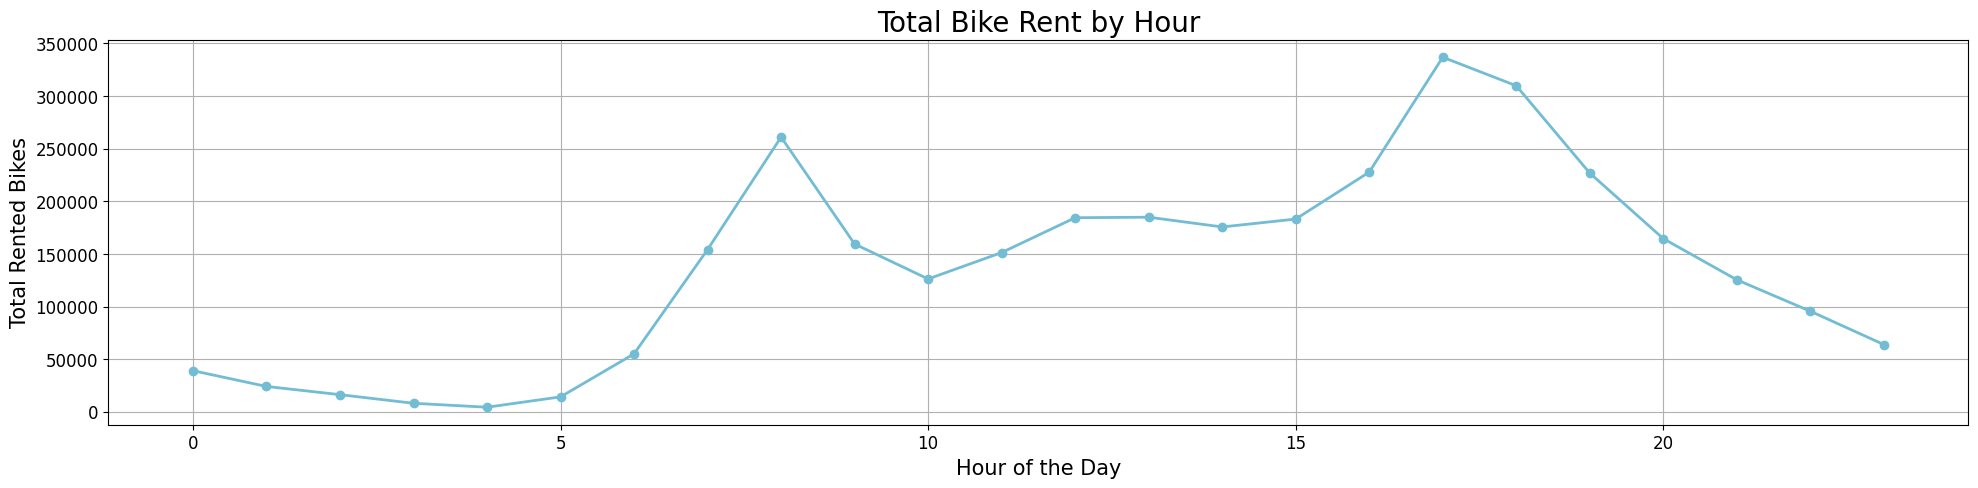

In [12]:
byhour_df = byhour_df.sort_values(by="hr")

plt.figure(figsize=(24, 5))
plt.plot(
    byhour_df["hr"],
    byhour_df["cnt"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Bike Rent by Hour", loc="center", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Hour of the Day', fontsize=15)
plt.ylabel('Total Rented Bikes', fontsize=15)
plt.grid(True)
plt.show()

### Pertanyaan 2:

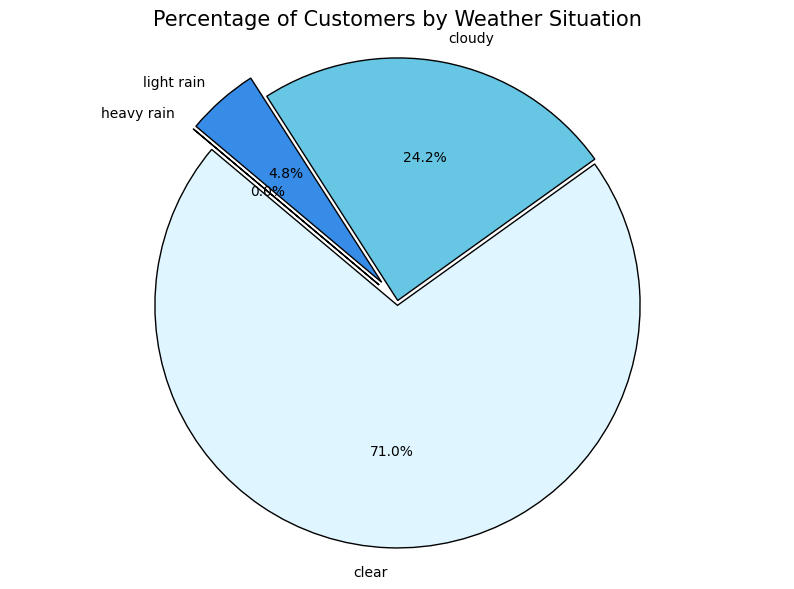

In [65]:
counts = byweathersit_df.sort_values(by="cnt", ascending=False)
labels = counts['weathersit']
sizes = counts['cnt']
colors = ["#DFF5FF", "#67C6E3", "#378CE7", "#5356FF"]
explode = (0.02, 0, 0.1, 0.1)

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor' : 'black'}, explode=explode)
plt.title("Percentage of Customers by Weather Situation", fontsize=15)
plt.axis('equal')

plt.show()

**Insight:**
- In the first graph, we can see that bike rentals are highest during the morning hours (7-9 AM) and evening hours (5-7 PM), which is due to the rush hour effect.
- In the piechart, we can see that customers prefer to rent bikes during clear weathers. Customers who experience light snow or rain are less likely to rent bikes.

## Analisis Lanjutan (Opsional)

## Conclusion

- The best hourours for bike rentals are morning around 8am and evening hours arouround 5pm.
- People tendto rent bikes during clear weathers, customers who experience light snow or rain are less likely to rent bikes.